<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Big Data II - Armazenamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Orientação a coluna;</li>
  <li>Particionamento.</li>
</ol>

---

# **Exercícios**

## 1\. Particionamento e orientação a coluna.

Replique as atividades da aula 3 em sua conta da AWS.

1.1. Fazendo o download do arquivo `crime.csv` (fonte [Kaggle](https://www.kaggle.com/yamqwe/chicago-crimee?select=chicago_crime_2014.csv)).

In [1]:
!wget https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/crime.csv -q -O crime.csv

1.2. Lendo  os dados em um DataFrame Pandas e criando a coluna `reference_date`.

In [2]:
# Solução do item 1.2.
import pandas as pd

filename = './crime'

df = pd.read_csv(f'./{filename}.csv')

In [3]:
#reconhecendo amostra e estrutura dados
df.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
0,0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235
1,1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702
2,2,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333
3,3,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739
4,4,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069


Vamos então conferir alguns metadados do DataFrame.

In [4]:
#Visualizando numero de colunas e linhas presentes no dado
df.shape

(274423, 18)

In [5]:
#verificando presença de dado nulo nesse caso não tem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274423 entries, 0 to 274422
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 274423 non-null  int64  
 1   ID                    274423 non-null  int64  
 2   Case Number           274423 non-null  object 
 3   Date                  274423 non-null  object 
 4   Block                 274423 non-null  object 
 5   IUCR                  274423 non-null  object 
 6   Primary Type          274423 non-null  object 
 7   Description           274423 non-null  object 
 8   Location Description  274247 non-null  object 
 9   Arrest                274423 non-null  bool   
 10  Domestic              274423 non-null  bool   
 11  Beat                  274423 non-null  int64  
 12  District              274423 non-null  int64  
 13  Ward                  274421 non-null  float64
 14  Community Area        274422 non-null  float64
 15  

Por fim, vamos realizar uma agregação para futura comparação. Nela, vamos contar a frequencia de ocorrência dos crimes agrupados localidades da cidade (coluna Location Description).

In [6]:
#Agrupando conjunto de dados por localização e numero de ocorrências
agg_df = df['Location Description'].value_counts()

In [7]:
agg_df

,count
Location Description,
STREET,63057
RESIDENCE,43139
APARTMENT,35041
SIDEWALK,30901
OTHER,10735
...,...
GAS STATION DRIVE/PROP.,1
BASEMENT,1
VESTIBULE,1


Vamos criar a coluna reference_date a partir da coluna Date no formato YYYY-MM-DD e entender se ela será uma boa coluna de partião.

In [8]:
from datetime import datetime

df['reference_date'] = df['Date'].apply(lambda date: datetime.strptime(date.split(sep=' ')[0], '%m/%d/%Y').strftime('%Y-%m-%d'))

In [9]:
#Verificado que coluna reference_date foi modificada para ano-mes-dia no inicio
df.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,reference_date
0,0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235,2014-01-01
1,1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702,2014-01-01
2,2,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333,2014-01-01
3,3,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739,2014-01-01
4,4,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069,2014-01-01


In [10]:
#Verificado que coluna reference_date foi modificada para ano-mes-dia no final
df.tail()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,reference_date
274418,274418,10362481,HY554205,08/15/2014 09:00:00 PM,048XX N CLARK ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,2032,20,46.0,3.0,11,NaN,NaN,2014-08-15
274419,274419,10362558,HY554336,08/31/2014 03:00:00 AM,028XX W 19TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,False,False,1022,10,12.0,30.0,02,NaN,NaN,2014-08-31
274420,274420,10363233,HY554972,02/20/2014 12:00:00 PM,046XX W NORTH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2533,25,37.0,25.0,11,NaN,NaN,2014-02-20
274421,274421,10363368,HY555019,09/02/2014 09:00:00 AM,047XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3.0,11,NaN,NaN,2014-09-02
274422,274422,10364473,HY556366,12/04/2014 09:00:00 AM,012XX W LUNT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2431,24,49.0,1.0,11,NaN,NaN,2014-12-04


Uma coluna que separa os dados em grupos bem distribuidos é uma boa candidata a uma coluna de partição. Vamos contar as ocorrências de crimes (logo, linhas) em cada um dos dias da coluna reference_date recém criada.

In [12]:
agg_df = pd.DataFrame(df['reference_date'].value_counts()).sort_index().reset_index()
agg_df = agg_df.rename(columns={'count': 'amount'})
agg_df = agg_df.rename(columns={'index': 'reference_date'})

In [14]:
agg_df.head()#confirmando inicio

,reference_date,amount
0,2014-01-01,1057
1,2014-01-02,480
2,2014-01-03,559
3,2014-01-04,576
4,2014-01-05,404


In [15]:
agg_df.tail()#confirmando final

,reference_date,amount
360,2014-12-27,716
361,2014-12-28,631
362,2014-12-29,677
363,2014-12-30,570
364,2014-12-31,577


In [16]:
print(agg_df.columns)

Index(['reference_date', 'amount'], dtype='object')


In [17]:
import seaborn as sns
import pandas as pd

# Verificando as colunas e os dados
print(agg_df.columns)
print(agg_df.head())

Index(['reference_date', 'amount'], dtype='object')
  reference_date  amount
0     2014-01-01    1057
1     2014-01-02     480
2     2014-01-03     559
3     2014-01-04     576
4     2014-01-05     404


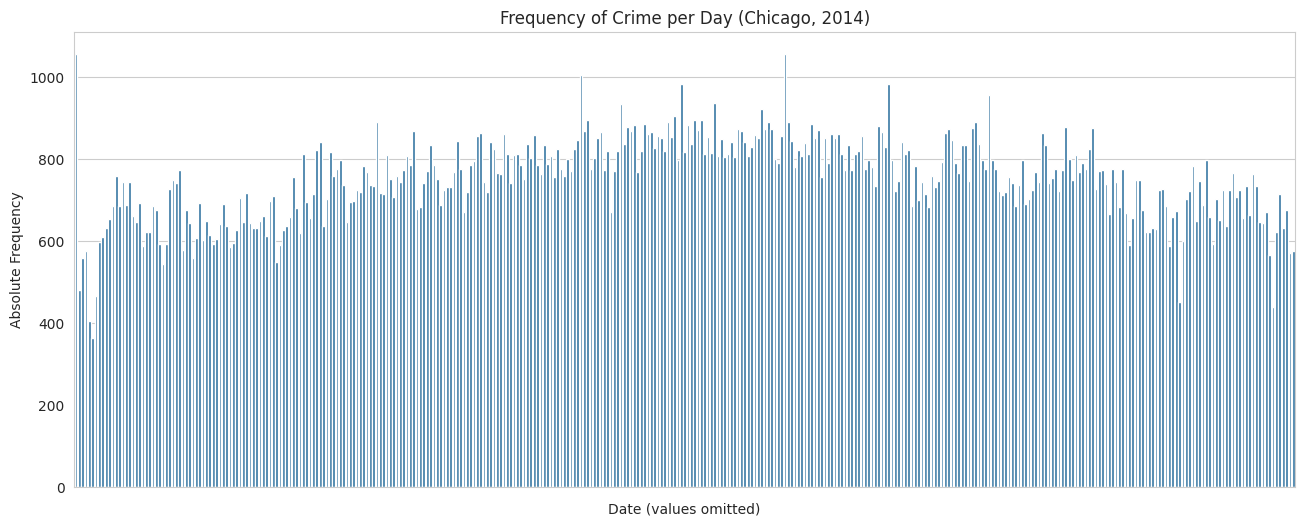

In [18]:
# Criando o gráfico

with sns.axes_style('whitegrid'):
    chart = sns.barplot(x='reference_date', y='amount', data=agg_df)
    chart.set(xticklabels=[])
    chart.set(title='Frequency of Crime per Day (Chicago, 2014)', xlabel='Date (values omitted)', ylabel='Absolute Frequency')
    chart.figure.set_size_inches(w=40/2.54, h=15/2.54)

Observa-se que a coluna reference_date de fato divide os dados em grupos equilibrados. Sendo assim, vamos salvar o DataFrame Pandas em arquivos comprimidos no formato Parquet, particionados pela coluna reference_date.

1.3. Persista o dado no DataFrame em um arquivo csv e em arquivos parquet, estes últimos comprimidos e particionados pela coluna `reference_date`.

In [19]:
# Solução do item 1.3.
#Particionando dados por coluna reference_date abaixo visualização de pasta criada crime com total de 365 arquivos um para cada dia
df.to_parquet('./crime', engine='pyarrow', compression='gzip', partition_cols='reference_date')

Salvando o DataFrame Pandas no formato CSV para garantir que os arquivos de ambas as abordagens possuem a coluna reference_date.

In [20]:
df.to_csv('./crime_enriched.csv', sep=',', index=False)

# AWS S3

1.4. Crie os recursos no AWS S3 e AWS IAM e persista os dados em seus respectivos *buckets*.

Na AWS, vamos criar os recursos tanto para o arquivo no formato csv quanto para os arquivos no formato parquet.

In [ ]:
# Solução do item 1.4.

**Parte 1: Dois Bucket criados no AWS S3 para armazenar o arquivo em formato CSV e outro para  o formato parquet**

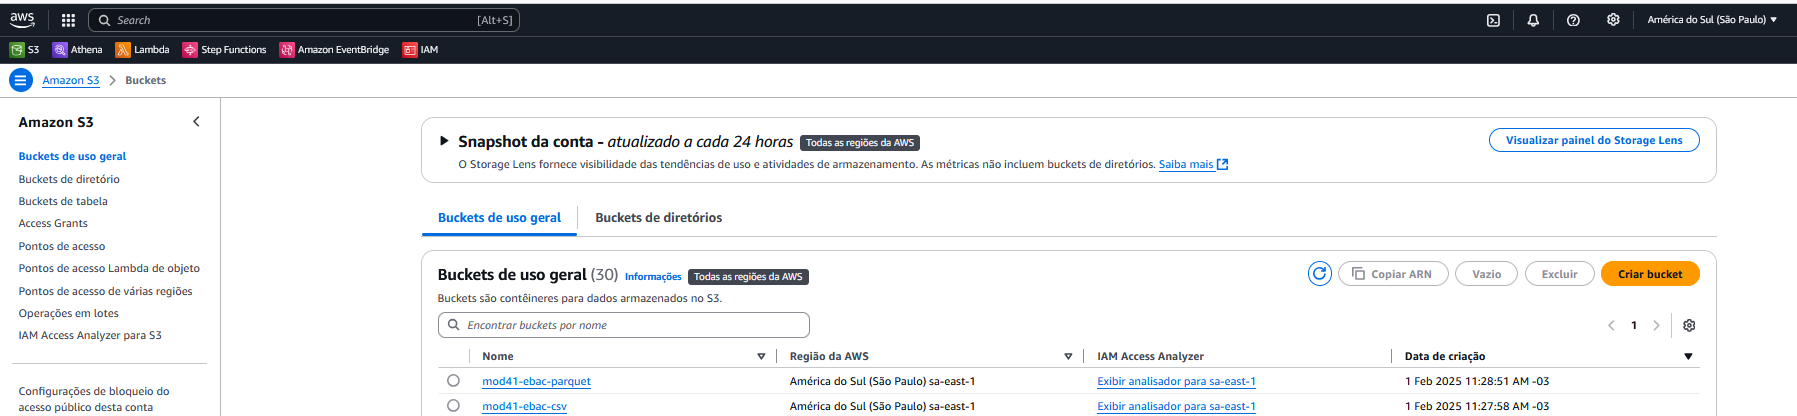

**Parte 2: Carregando arquivo csv no bucket**

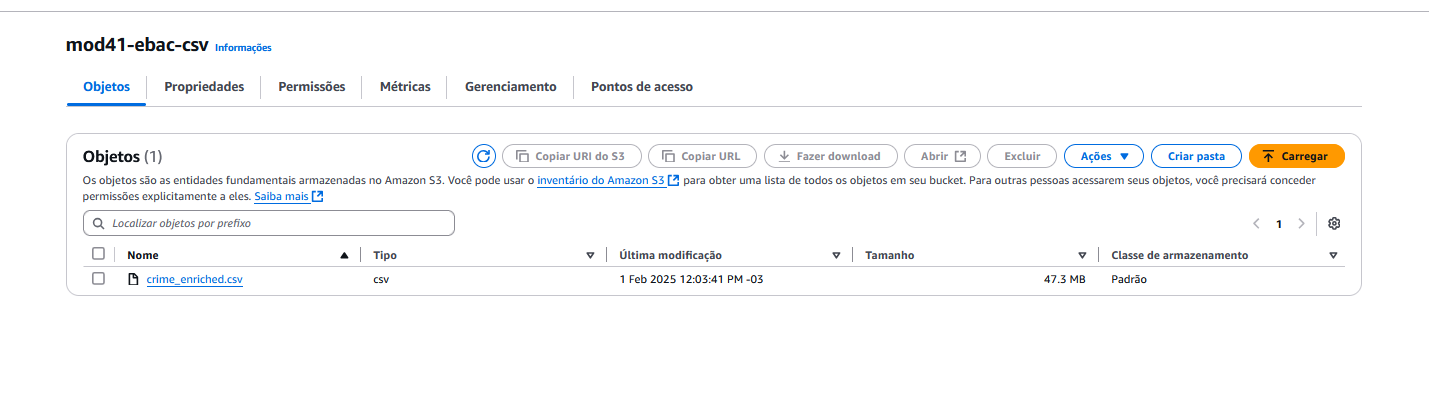

**Parte 3: Após criar bucket para o arquivo parquet foi criado Usuário no `AWS IAM` para fazer o *upload* dos arquivos e suas partições.** **

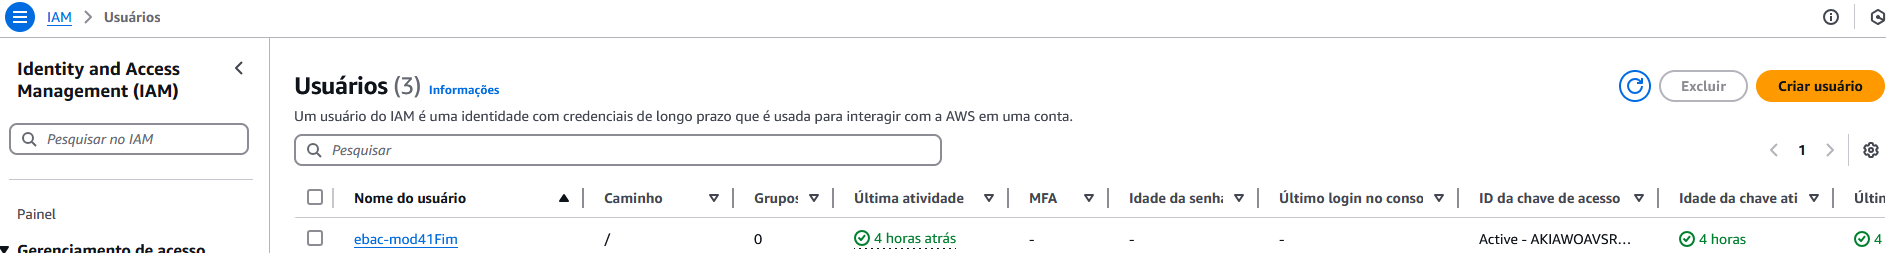

**Parte 4: Então, em seguida foi  inserido as credenciais no Python.**

In [21]:
from getpass import getpass

aws_access_key_id = getpass()

··········


In [22]:
from getpass import getpass

aws_secret_access_key = getpass()

··········


**Parte 5: Devemos instalar o pacote Boto3, o SDK Python da AWS.**

In [23]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.9 MB/s eta 0:00:00


**Parte 6: Por fim, vamos criar o nosso cliente e fazer o upload das partições.**

In [24]:
import boto3

client = boto3.client(
  's3',
  aws_access_key_id=aws_access_key_id,
  aws_secret_access_key=aws_secret_access_key
)

In [ ]:
#Carregando dados no s3
import os

BUCKET = 'mod41-ebac-parquet'

i = 0

for root, dirs, files in os.walk('./crime'):
  elapsed = f'{round(100*i/365, 2)} %'
  print(elapsed)
  for file in files:
    path = os.path.join(root, file)
    bucket_path = '/'.join(path.split(sep='/')[2:])
    client.upload_file(path, BUCKET, bucket_path)
    #Abaixo será feita uma contagem para saber como está o upload
  i = i + 1


**Parte 7: Ao verificar no Bucket vemos que foi feito o upload das partições como esperado no AWS S3**

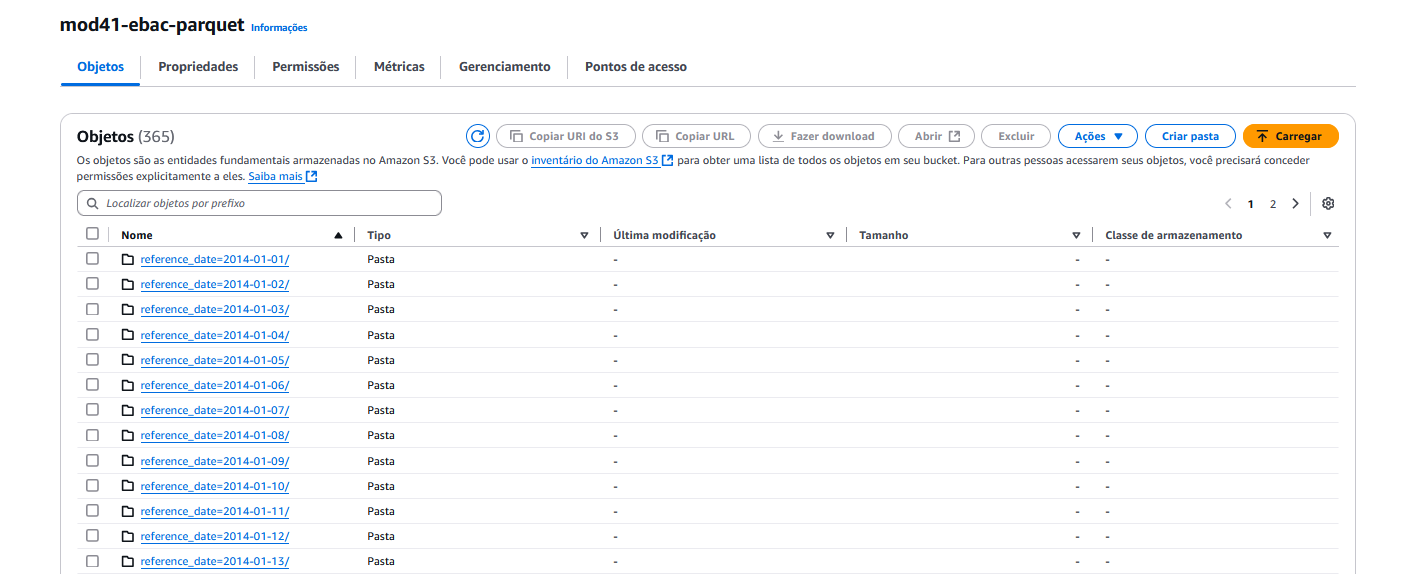

1.5. Crie os recursos no AWS Athena e execute as consultas SQL da aula.

Na AWS, vamos criar os recursos tanto para o arquivo no formato csv quanto para os arquivos no formato parquet.

 - **Parte 1: CSV** Criando Tabela no `AWS Athena` apontando para o arquivo do S3.

***Query-1:***

In [ ]:

CREATE EXTERNAL TABLE `crime_csv`(
  `index` bigint,
  `id` string,
  `case number` string,
  `date` string,
  `block` string,
  `iucr` string,
  `primary type` string,
  `description` string,
  `location description` string,
  `arrest` string,
  `domestic` string,
  `beat` string,
  `district` string,
  `ward` string,
  `community area` string,
  `fbi code` string,
  `latitude` string,
  `longitude` string,
  `reference_date` string)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.serde2.OpenCSVSerde'
 WITH SERDEPROPERTIES (
   'separatorChar' = ',',
   'quoteChar' = '\"',
   'escapeChar' = '\\'
   )
STORED AS INPUTFORMAT
  'org.apache.hadoop.mapred.TextInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
LOCATION
  's3://mod41-ebac-csv/'
TBLPROPERTIES (
  "skip.header.line.count"="1")



**Imagem de Query-1: Criando tabela no AWS Athena Crime_csv:**

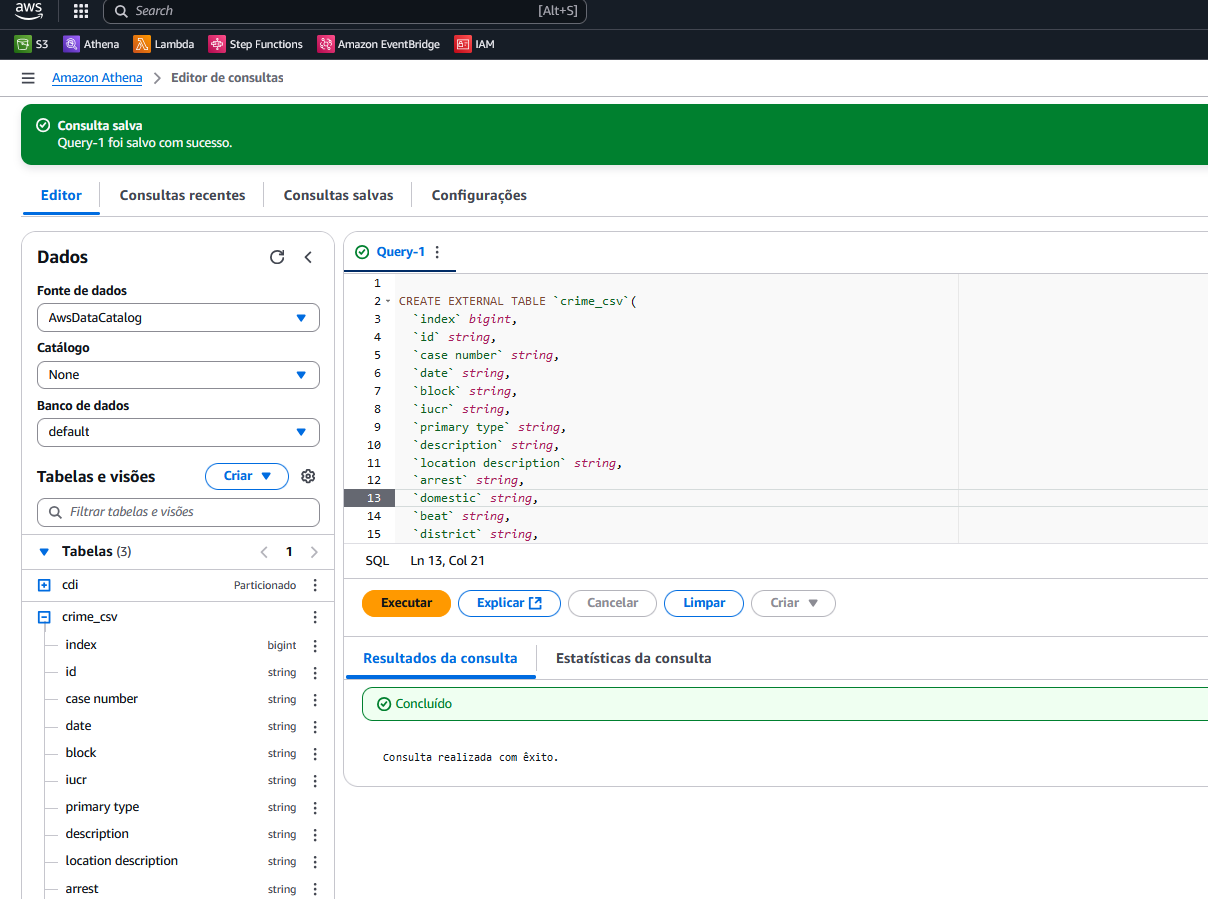

 - **Parte 2: Criando tabela no Athena crime_Parquet**

Vamos criar os recursos na AWS:


1. Tabela no `AWS Athena` apontando para os arquivos e suas partições.
1. Carregar as partições.

***Query-2:***

In [ ]:

CREATE EXTERNAL TABLE `crime_parquet`(
  `index` bigint,
  `id` bigint,
  `case number` string,
  `date` string,
  `block` string,
  `iucr` string,
  `primary type` string,
  `description` string,
  `location description` string,
  `arrest` boolean,
  `domestic` boolean,
  `beat` bigint,
  `district` bigint,
  `ward` double,
  `community area` double,
  `fbi code` string,
  `latitude` double,
  `longitude` double)
PARTITIONED BY (
  `reference_date` string)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://mod41-ebac-parquet/'



**Query 2:Criando tabela crime_parquet**

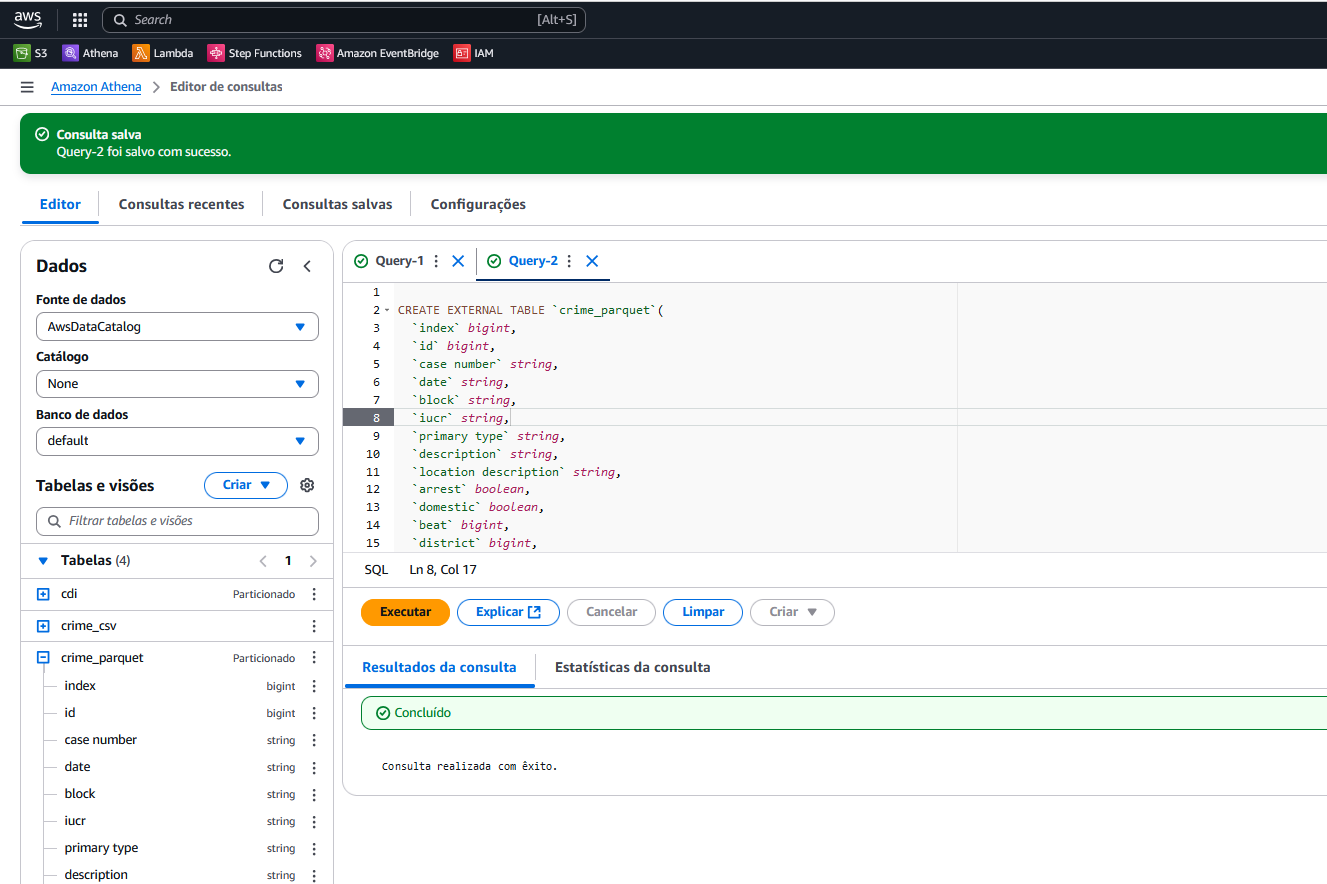

***Query-3:***

```sql
MSCK REPAIR TABLE `crime_parquet`;
```

**Query 3 :Necessário ser Criado repartições no Athena:**

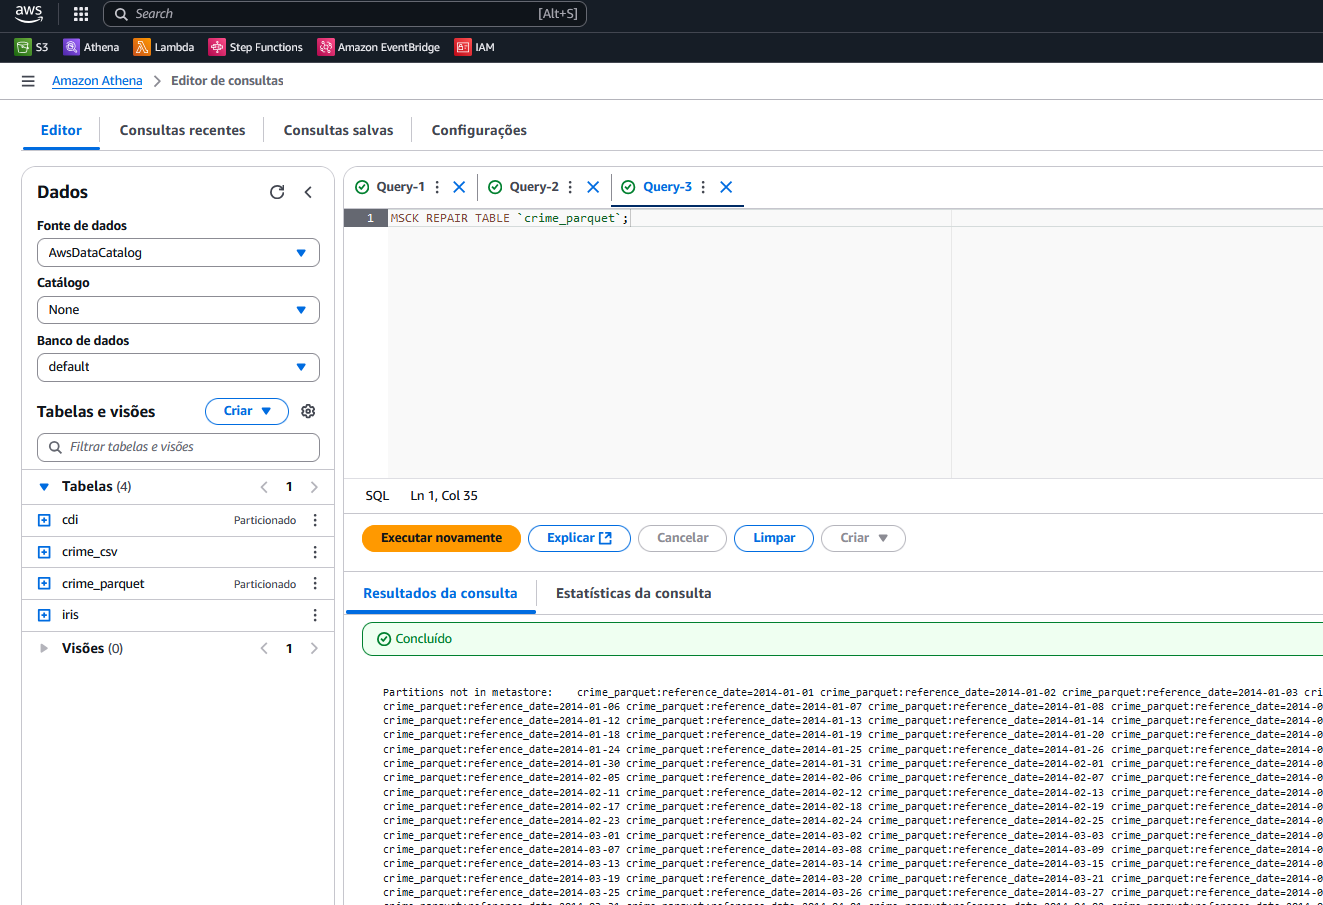

Por fim, vamos executar um conjunto de consultas SQL em ambas as tabelas e observar a quantidade de dados escaneados.

 - Efeito da **orientação a coluna**:

***Query-4:***

```sql
SELECT "location description", COUNT(1) as "amount"
FROM crime_csv
GROUP BY 1
ORDER BY 2 DESC;
```

**Query-4 Resultado em tabela crime_csv:**

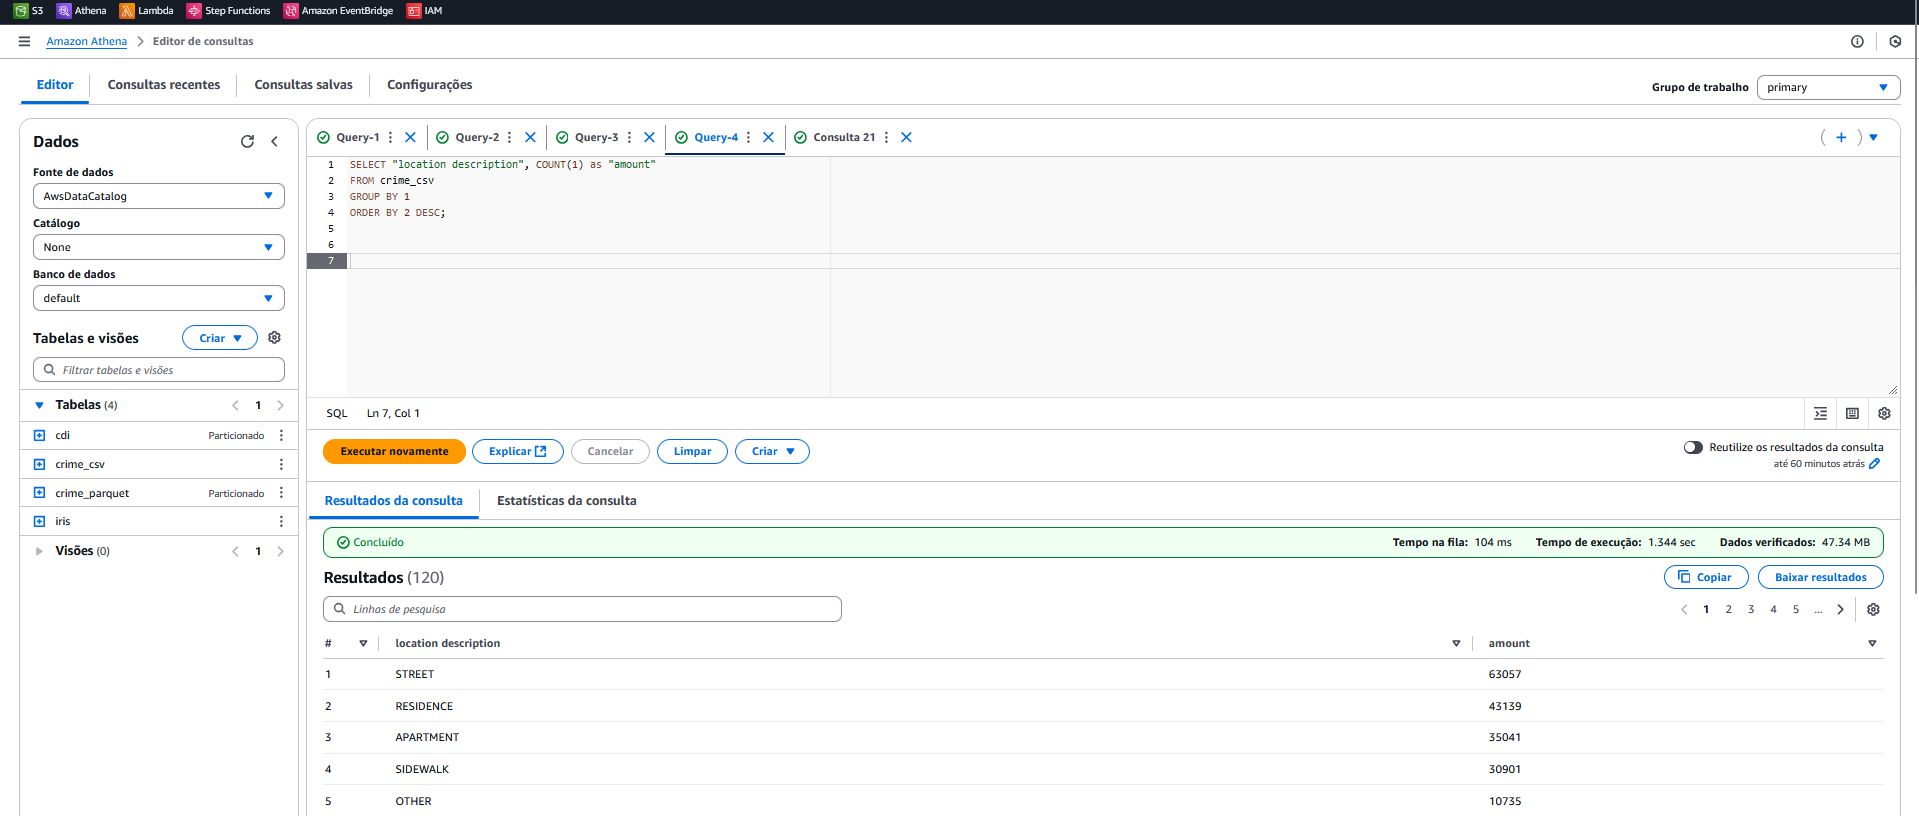

***Query-5:***

```sql
SELECT "location description", COUNT(1) as "amount"
FROM crime_parquet
GROUP BY 1
ORDER BY 2 DESC;
```

**Query-5 Resultado em tabela crime_parquet:**

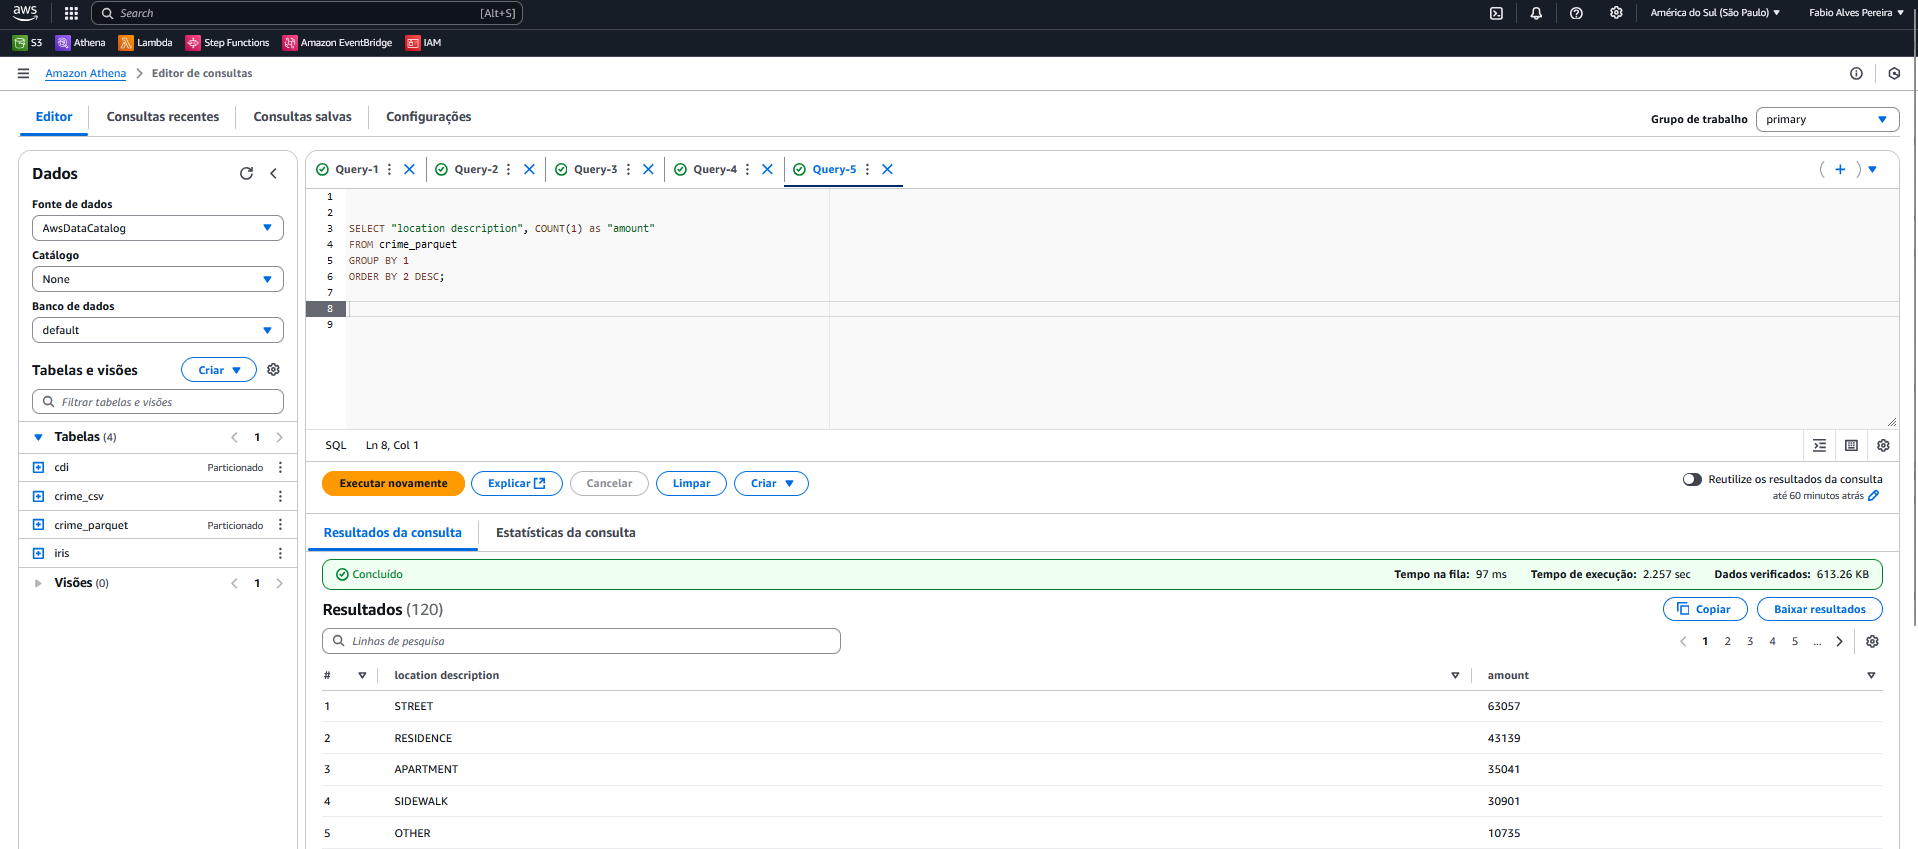

A consulta escaneou 47.34 MB para a tabela `crime_csv`, que é o mesmo tamanho do arquivo, logo um *full scan*. Já para a tabela `crime_parquet`, a consulta escaneou 0.44 MB. Ou seja, a tabela com o dado **orientado a coluna** escaneou **108 vezes** menos dados para a consulta SQL que seu par em `csv`.

 - Percebendo o Efeito do **particionamento**:

***Query-6:***

```sql
SELECT *
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
```

**Query-6 Resultado:**

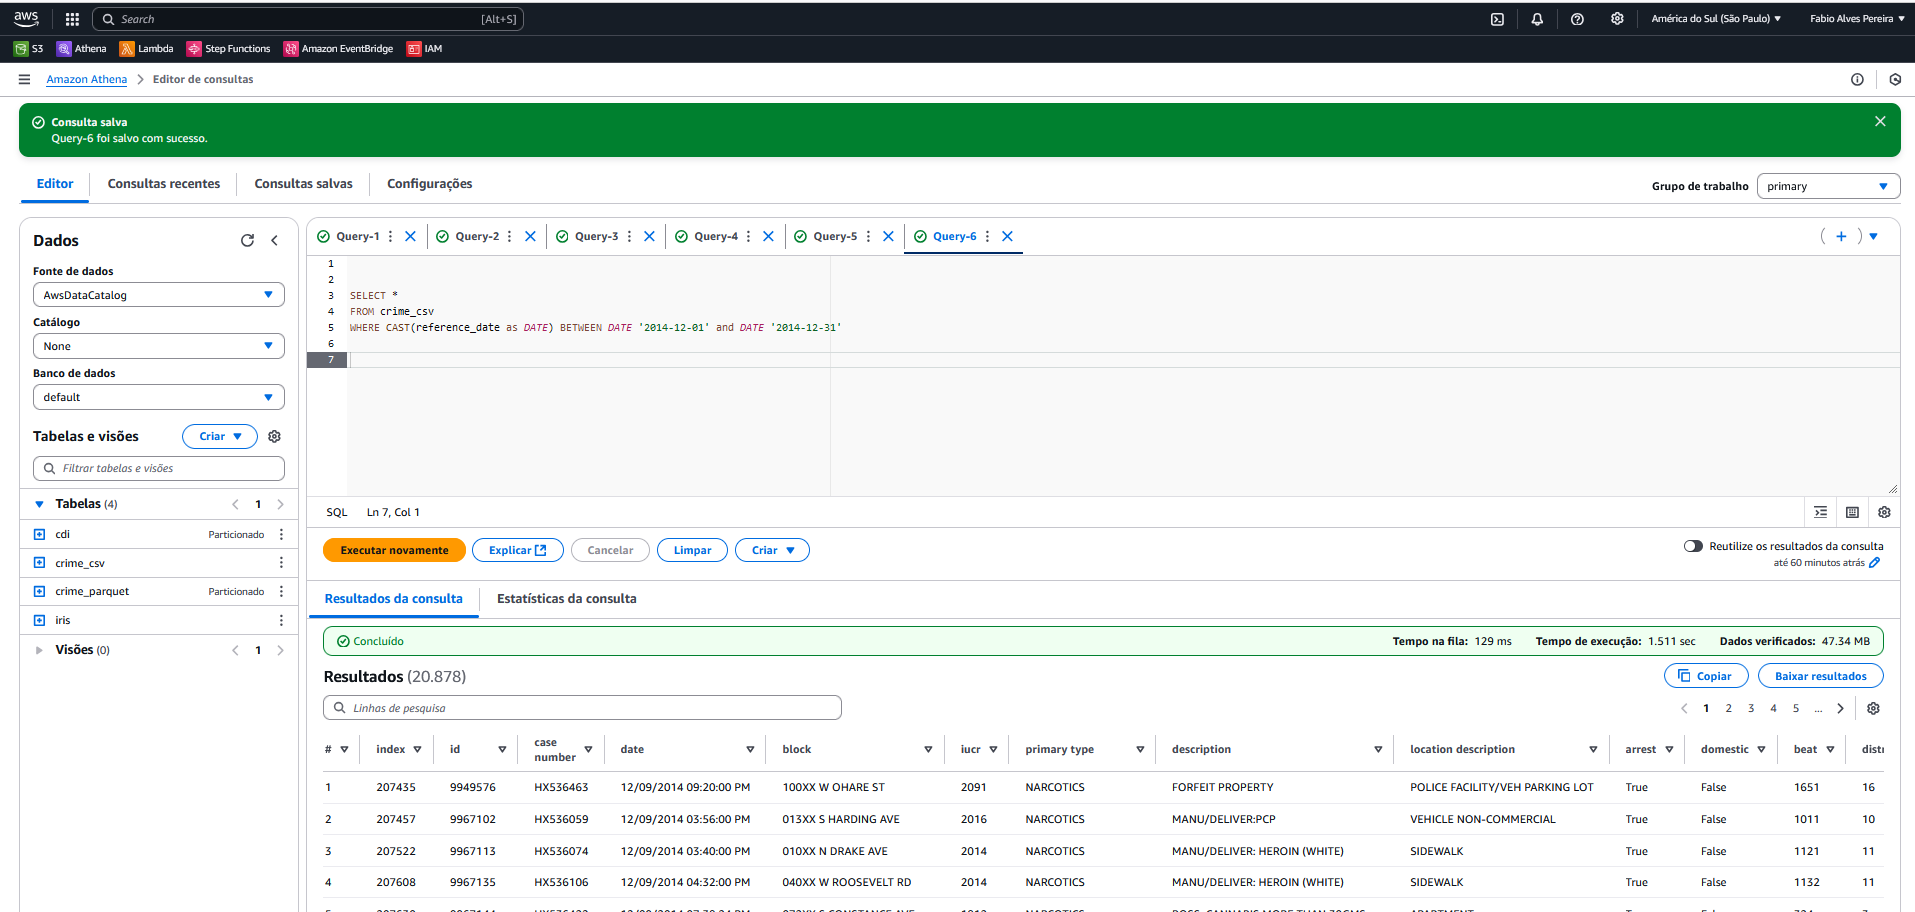

***Query-7:***

```sql
SELECT *
FROM crime_parquet
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
```

**Query-7: Resultado**

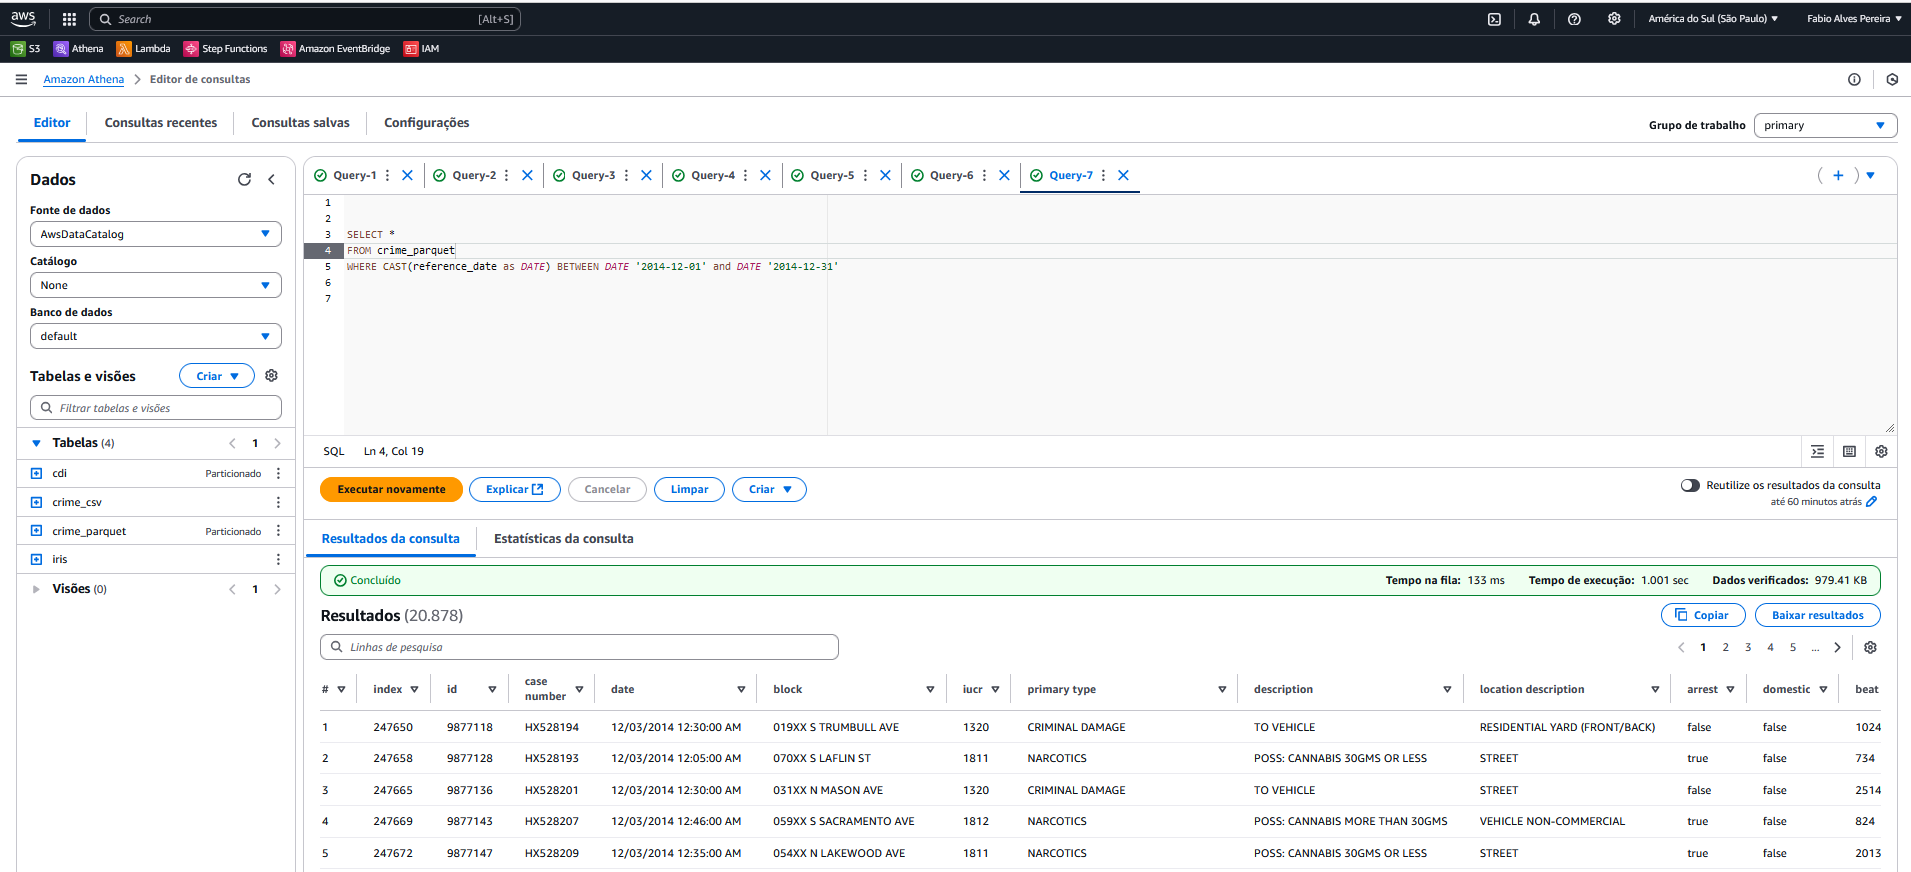

A consulta escaneou 47.34 MB para a tabela `crime_csv`, que é o mesmo tamanho do arquivo, logo um *full scan*. Já para a tabeka `crime_parquet`, a consulta escaneou 1.00 MB. Ou seja, a tabela com o dado **particionado** escaneou **47.34 vezes** menos dados para a consulta SQL que seu par em `csv`.

- Analisando Efeito da **orientação a coluna** e do **particionamento**:

***Query-8:***

```sql
SELECT "location description", COUNT(1) as "amount"
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
GROUP BY 1
ORDER BY 2 DESC
```

**Query-8 Resultado:**

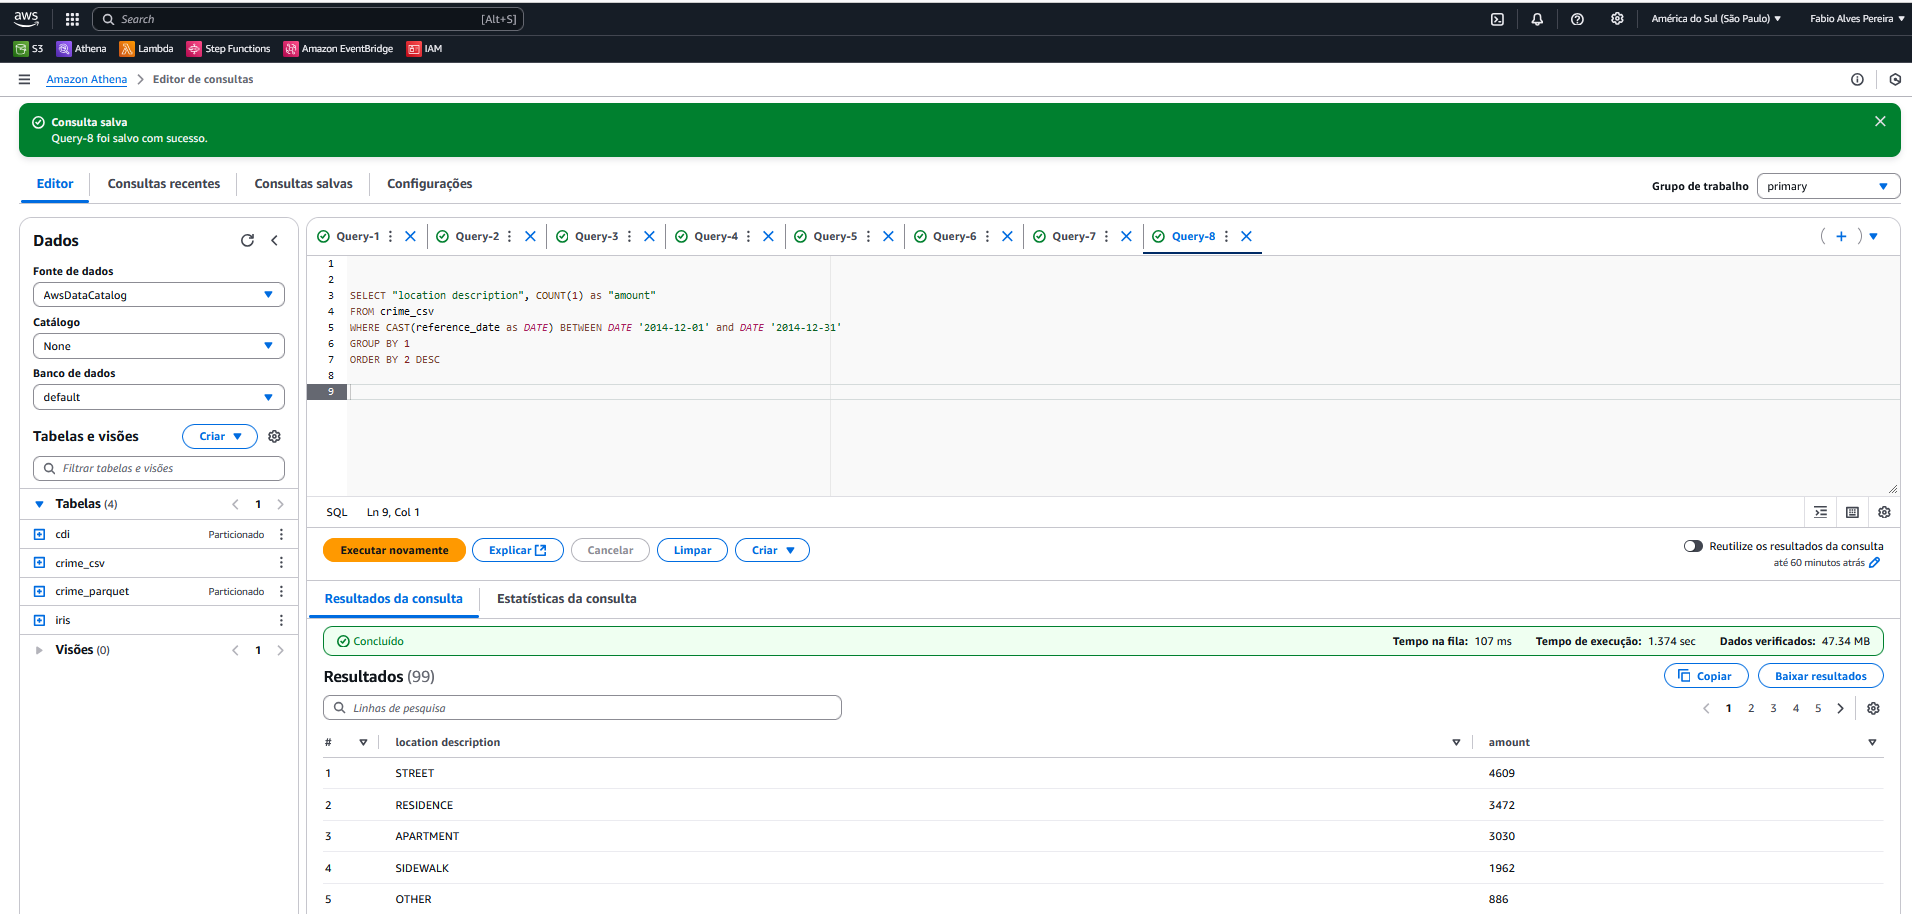

***Query-9:***

```sql
SELECT "location description", COUNT(1) as "amount"
FROM crime_parquet
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
GROUP BY 1
ORDER BY 2 DESC
```

**Query-9 Resultado:**

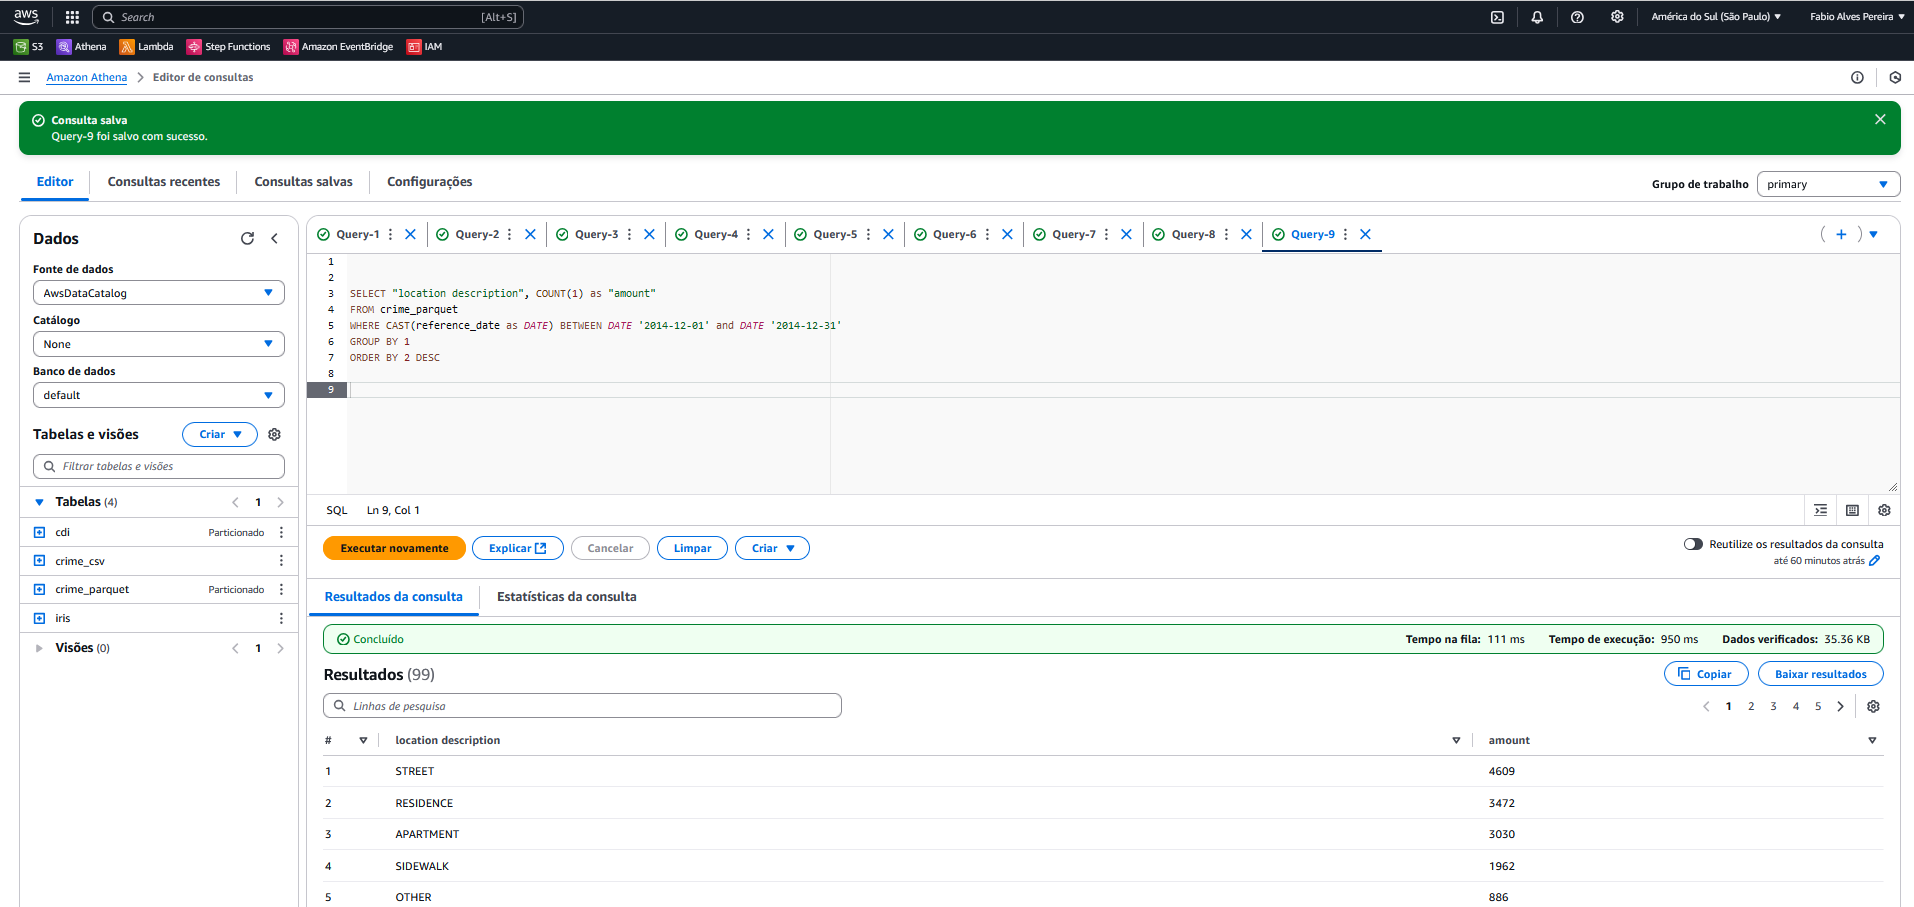

A consulta escaneou 47.34 MB para a tabela `crime_csv`, que é o mesmo tamanho do arquivo, logo um *full scan*. Já para a tabela `crime_parquet`, a consulta escaneou 0.04 MB. Ou seja, a tabela com o dado **particionado** e **orientado a coluna** escaneou **1183.5 vezes** menos dados para a consulta SQL que seu par em `csv`.